In [43]:
#setup cell
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

df = pd.read_csv("co2.csv")
df_reduced = df.head(1000)
print(len(df_reduced))
df_reduced.head()



1000


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [44]:
#ML method Cell
def update(theta0, theta1, m, x, y):

  y_hat = theta1 * x + theta0         # fill with a vectorized expression using theta0, theta1, x
  errors = y_hat - y

  J = np.dot(errors, errors) / (2*m) # same as np.dot(errors, errors)
  # print(J)

  alpha = 0.01
  grad_theta0 = (1/m) * np.sum(errors)
  grad_theta1 = (1/m) * np.sum(errors * x)

  theta0 = theta0 - alpha * grad_theta0
  theta1 = theta1 - alpha * grad_theta1
  # print(theta0)
  # print(theta1)
  return theta0, theta1, J



In [64]:
#ML cell
engineSize = df_reduced['Engine Size(L)']
co2 = df_reduced['CO2 Emissions(g/km)']
x = engineSize.to_numpy()
y = co2.to_numpy()

theta0 = 132
theta1 = 32
steps = 20
m = len(x)

theta0_list = []
theta1_list = []
error_list = []

yH = []
for j in range(len(x)):
    yH.append(theta1*x[j] + theta0)

errors = (np.mean((y-yH)**2))/2

for i in range(steps):
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  error_list.append(errors)
  theta0, theta1, errors = update(theta0, theta1, m, x, y)


theta0_list = [float(x) for x in theta0_list]
theta1_list = [float(x) for x in theta1_list]
error_list = [float(x) for x in error_list]




Text(0, 0.5, 'Cost')

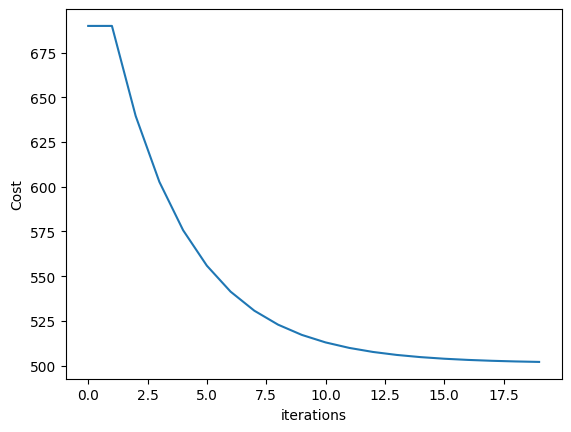

In [65]:
step_list = [i for i in range(steps)]
plt.plot(step_list, error_list)
plt.xlabel("iterations")
plt.ylabel("Cost")


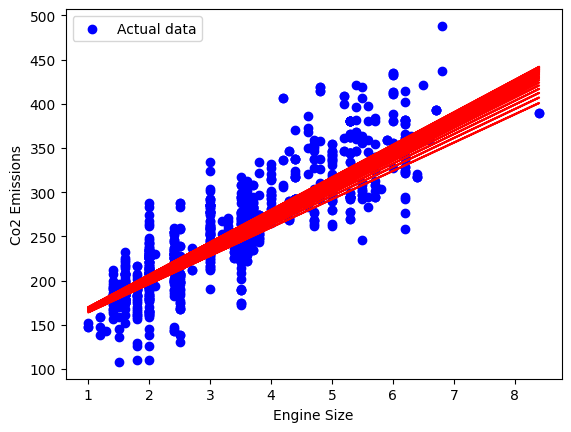

In [66]:
from os import XATTR_CREATE
#graph cell
plt.scatter(x, y, color="blue", label="Actual data")
yreal = []
for i in range(len(theta0_list)):
  for j in range(len(x)):
    yreal.append(theta1_list[i]*x[j] + theta0_list[i])

  plt.plot(x, yreal, color="red")
  yreal = []

plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.legend()
plt.show()